# Example Programs - Week 4 (Functions and a little Pandas)

Below, we explore some basic Python programs using concepts from this week's class.  These examples are intended to demonstrate defining and using functions in your programs.  Functions provide a way to modularize your program, making reuseable functionality available to your program and simplifying program code.  Additionally, we introduce Pandas, a powerful Python library for reading, writing, manipulating, and analyzing data.


## Chapter 7, Problem 1

Write a function that can return each of the first three spherical Bessel functions:


$\large j_0(x) = \frac{sin(x)}{x} $

$\large j_1(x) =  \frac{sin(x)}{x^2} -  \frac{cos(x)}{x} $

$\large j_2(x) =  ( \frac{3}{x^2} - 1) \frac{sin(x)}{x} -  \frac{3 cos(x)}{x^2} $


Your function should take as arguments a NumPy array 𝑥 and the order 𝑛, and should return an array of the designated order 𝑛 spherical Bessel function. **Take care to make sure that your functions behave properly at 𝑥 = 0.**

Demonstrate the use of your function by writing a Python routine that plots the three Bessel functions for 0 ≤ 𝑥 ≤ 20. Your plot should look like the one below.

Something to think about: You might note that 𝑗1(𝑥) can be written in terms of 𝑗0(𝑥), and that 𝑗2(𝑥) can be written in terms of 𝑗1(𝑥) and 𝑗0(𝑥). Can you take advantage of this to write a more efficient function for the calculations of 𝑗1(𝑥) and 𝑗2(𝑥)?

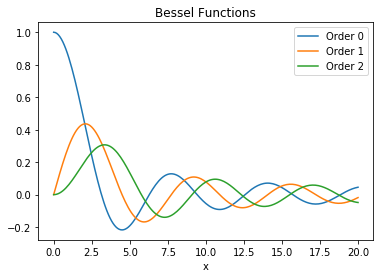

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


def Bessel( X, n ):
    """
    """
    if n == 0:
        return [(sin(x)/x) if fabs(x) > 0.0 else 1.0 for x in X]
    elif n == 1:
        return [(sin(x)/(x*x) - cos(x)/x) if fabs(x) > 0.0 else 0.0 for x in X]
    elif n == 2:
        return [(((3/(x*x))-1)*sin(x)/x - 3*cos(x)/(x*x)) if fabs(x) > 0.0 else 0.0 for x in X]
    else:
        return False;


# run functions for x=[0,20]
X = np.arange(0,20.01,0.1)

Y0 = Bessel( X, 0 )
Y1 = Bessel( X, 1 )
Y2 = Bessel( X, 2 )

# plot some results!
plt.plot( X,Y0, label="Order 0" )
plt.plot( X,Y1, label="Order 1"  )
plt.plot( X,Y2, label="Order 2"  )
plt.xlabel("x")
plt.legend()
plt.title( "Bessel Functions")
plt.show()

## Chapter 7, Problem 2

Write a function that simulates the rolling of 𝑛 dice. Use the NumPy function random.random_integers(6), which generates a random integer between 1 and 6 with equal probability (like rolling fair dice). The input of your
function should be the number of dice thrown each roll and the output should be the sum of the 𝑛 dice.

(b) “Roll” 2 dice 10,000 times keeping track of all the sums of each set of rolls in a list. Then use your program to generate a histogram summarizing the rolls of two dice 10,000 times. 

The result should look like the histogram plotted below. Use the MatPlotLib function hist (see http://matplotlib.org/api/pyplot_summary.html) and set the number of bins in the histogram equal to the number of different possible outcomes of a roll of your dice. For example, the sum of two dice can be anything between 2 and 12, which corresponds to 11 possible outcomes. You should get a histogram that looks like the one below.

(c) “Repeat part (b) using 3 dice and plot the resulting histogram. 


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  # Remove the CWD from sys.path while we load stuff.


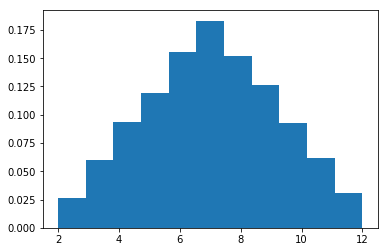

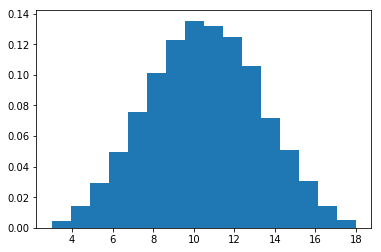

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def RollDice(nDice):
    sum = 0    
    # throw each dice
    for i in range(0,nDice):
        sum += np.random.random_integers(6)  # get a number in [1,6]
    
    return sum


#---------------
# main program
#---------------
sums = np.zeros(10000)
for i in range(0, 10000):
    sums[i] = RollDice(2)
    
plt.hist(sums, bins=11, normed=True )
plt.show()    

for i in range(0, 10000):
    sums[i] = RollDice(3)
    
plt.hist(sums, bins=16, normed=True )
plt.show()    

## Chapter 7, Problem 4, 5

Write a new fitting function LineFitWt(x, y) that implements the formulas given in Eq. (7.14) that minimize the 𝜒2 function give by Eq. (7.12). This more general approach is valid when the individual data points have different weightings or when they all have the same weighting. You should also write a function to calculate the reduced chi-squared defined by Eq. (7.12).

Write a Python program that reads in the data below, plots it, and fits it using the two fitting functions LineFit(x, y) and LineFitWt(x, y). Your program should plot the data with error bars and with both fits with and without weighting, that is from LineFit(x, y) and LineFitWt(x, y, dy). It should also report the results for both fits on the plot, similar to the output of the supplied program above, as well as the values of 𝜒2𝑟, the reduced chi-squared value, for both fits. Explain why weighting the data gives a steeper or less steep slope than the fit without weighting.

Modify the function LineFitWt(x, y) you wrote in Exercise 4 above so that in addition to returning the fitting parameters 𝑎 and 𝑏, it also returns the uncertainties in the fitting parameters 𝜎𝑎 and 𝜎𝑏 using the formulas given by Eq. (7.16). Use
your new fitting function to find the uncertainties in the fitted slope and 𝑦-intercept for the data provided with Exercise 4.

-9.23414248039 171.89273557
-10.0921767855 185.484573468 0.725530170005 0.274076178974 38.0209230081


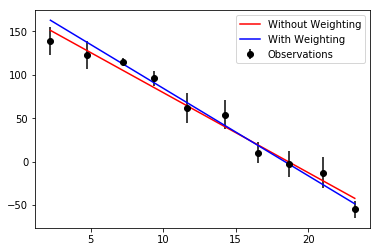

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def LineFit(x, y):
    ''' Returns slope and y-intercept of linear fit to (x,y)
    data set'''
    xavg = x.mean()
    slope = (y*(x-xavg)).sum()/(x*(x-xavg)).sum()
    yint = y.mean()-slope*xavg
    return slope, yint

def LineFitWts(x,y,w):
    w2 = w**2
    xavg = np.sum(x/w2) / np.sum(1/w2)
    yavg = np.sum(y/w2) / np.sum(1/w2)
    slope = np.sum((x-xavg)*y/w2) / np.sum((x-xavg)*x/w2)
    yint = yavg-slope*xavg
    
    # calculate chi-squared
    chiSq = np.sum( ((y-yint-slope*x )/w)**2)
    chiSqRed = chiSq/(len(x)-2)
    
    # calculate uncertainty of estimates
    sb2 = 1 / np.sum((x-xavg)*x/w2)
    sa2 = sb2 * np.sum((x**2)/w2) / np.sum(1/w2)
    
    return slope, yint, chiSqRed, sb2, sa2
                   

time = np.array([2.23,4.78,7.21,9.37,11.64,14.23,16.55,18.70,21.05,23.21])
vel = np.array([139,123,115,96,62,54,10,-3,-13,-55])
uncertainty = np.array([16,16,4,9,17,17,12,15,18,10 ])

slope,intercept = LineFit(time,vel)
print( slope, intercept )

# modeled results
y1 = intercept + slope*time;

slope,intercept, chiSqRed, uncertSlope, uncertInt = LineFitWts(time,vel, uncertainty)
print( slope, intercept, chiSqRed, uncertSlope, uncertInt )

# modeled results
y2 = intercept + slope*time;

plt.errorbar( time,vel, fmt="ko", yerr=uncertainty, label="Observations")
plt.plot( time,y1, "r", label="Without Weighting" )
plt.plot( time,y2, "b", label="With Weighting")


plt.legend()
plt.show()

## Bonus: Solving Systems of Ordinary Differential Equations

For this problem we will solve a model describing bioreactor dyamics over time. The bioreactor includes a population of bacteria (X) that are consuming a substrate (S) and producing a product (P) (e.g. a fermentation process).  It is a _batch_ reactor, which means that once started, no additional input is added.  Without getting into too many details, the model tracks these three quantities through time. The rate of change of the quantities are described by the following ordinary differential equations:

> - Substrate: dS/dt = (-1/Y<sub>xs</sub>) \* (u-k<sub>d</sub>) \* X    
> - Bacteria: dX/dt = (u\*X) - (k<sub>d</sub> \* X)                    
> - Product: dP/dt = q<sub>p</sub> \* dS/dt 
>
> where:
> - u: per-capita growth rate, = m<sub>max</sub> \* S/(k<sub>s</sub>+S )
> - k<sub>s</sub>: half-velocity parameter
> - k<sub>d</sub>: per-capita bacterial mortality rate
> - Y<sub>xs</sub>: Yield constant
> - u<sub>max</sub>: Maximum bacteria growth rate
> - q<sub>p</sub>: product yield

We will solve this with the following values:
> - k<sub>s</sub> = 0.75/day 
> - k<sub>d</sub> = 0.03/day
> - Y<sub>xs</sub> = 0.5 g/g
> - u<sub>max</sub> = 0.5/day
> - q<sub>p</sub> = 0.25/day
> - S<sub>0</sub> = 20 g/L
> - X<sub>0</sub> = 0.10 g/L  
> - P<sub>0</sub> = 0 g/L

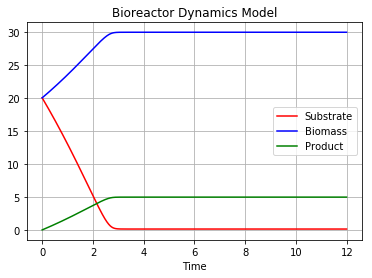

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define parameters
ks = 0.75     # /day
kd = 0.03     # /day
yxs = 0.5     # g/g
mumax = 0.2    # /day
qp = 0.25     # /day

# define model derivative function
def bioreactor( Y, t ):
    s = Y[0]   # extract state variables
    x = Y[1]
    p = Y[2]

    mu=((mumax*s)/(ks+s))       # Monod Kinetics
    dSdt=(-1/yxs)*((mu-kd)*x)   # Mass balance of substrate
    dXdt=(mu*x)-(kd*x)          # Mass balance of cells
    dPdt=-qp*dSdt                # Mass balance of products

    return [ dSdt, dXdt, dPdt ]

######################
# main program
######################

# Initial conditions
S0 = 20       # g/L
X0 = 0.10     # g/L
P0 = 0        # g/L

# simulation setup
end = 12
dt = 0.01      # basic simulation parameters

# create array for time values
time = np.arange( 0, end, dt )  # create time values

# solve the model
Y = odeint( bioreactor, [S0, S0, P0], time )   # integrate

#plot results
s = Y[:,0]
x = Y[:,1]
p = Y[:,2]

plt.plot(time, s, 'r-', label='Substrate')
plt.plot(time, x, 'b-', label='Biomass')
plt.plot(time, p, 'g-', label='Product')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.title('Bioreactor Dynamics Model')
plt.show()

## More Bonus - Pandas Example

This example shows how to use Pandas to access an Excel spreadsheet that lives on the web. T also show the basic use of ** subplots **

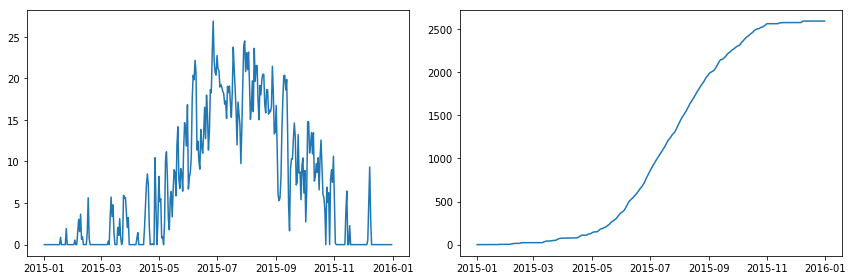

In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def GrowingDegreeDays( tMin, tMax, tBase ):
    """
    Calculates Growing Degree Days
    :param tMin: Minimum daily temperature (F)
    :param tMax: Maximum daily temperature (F)
    :param tBase: Base temperature (F)
    :return: growing degree days for this day
    """
    if tMax > 86:
        tMax = 86
    gdd =  (tMax + tMin)/2 - tBase
    if gdd < 0:
        gdd = 0
    return gdd

def Accumulate( inArray ):
    """
    Generate an array of accumulating values from a given input array
    :param inArray: input array values to be accumulated 
    :return: array of accumulated values
    """
    outArray = np.zeros( len(inArray) )
    outArray[0] = inArray[0]
    for i in range(1,len(inArray)):
        outArray[i] = outArray[i-1] + inArray[i]
    return outArray


## Main program

# first, get some data
df = pd.read_excel("http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/AgrimetClimateCRVO.xlsx")

tBase = 50
dates = df['Date']
tMins = df['TempMin-F']
tMaxs = df['TempMax-F']

gdds = np.zeros(len(dates))

for i in range(0, len(dates)):
    gdds[i] = GrowingDegreeDays( tMins[i], tMaxs[i], tBase )

cgdds = Accumulate( gdds )

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)  # 1 rows, 2 col, first plot
# plot results
plt.plot( dates, gdds )

plt.subplot(1,2,2) # 1 rows, 2 col, second plot
plt.plot( dates, cgdds )
plt.tight_layout()
plt.show()